In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from math import log2
import matplotlib.pyplot as plt
import classifier_utils

In [2]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

In [3]:
selected_dataset.columns

Index(['chunk_id', 'developerdecision', 'line_start', 'line_end',
       'line_separator', 'kind_conflict', 'url', 'project', 'project_user',
       'project_name', 'path', 'file_name', 'sha', 'leftsha', 'rightsha',
       'basesha'],
      dtype='object')

In [4]:
selected_dataset

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
0,777206,ConcatenationV2V1,427,436,434,"Attribute, Comment, Method invocation",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,2d88e89330552363f1d2af979ac3ebf232a91fb3,9d7836b5669d0e46f064fc9e6f38cf083af0596d,1f156abfcadb3d3913098ee78c1bd0d94fb71e9b,64ee8602e09ea183670543eef0641cbbbaf73aa9
1,777207,Version 1,2826,2871,2827,"Comment, Method declaration",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,2d5c6e5d12d784bd7538eb5aab421691ce4c688d,2cc6902f6ee2d91c8629a6e2c9a52e4e097bf458,b514b5f6701fda49873f080da5be47a16a960394,af5bfb3e0e56ecd8413c853d266babe49a95e16e
2,777216,Combination,2458,2465,2463,"Comment, Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,f32b758df664833130d5d75006a09df0fae43d71,a4aadbce8fcf23feae6eae07232615200796f017,51e8088a8bb66a2724ca26c8aa84b8f4e7db1a4c,1faa5059f12dc3df89ac25550565b3cfda91a6a2
3,777218,Combination,2476,2482,2479,"Comment, Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,f32b758df664833130d5d75006a09df0fae43d71,a4aadbce8fcf23feae6eae07232615200796f017,51e8088a8bb66a2724ca26c8aa84b8f4e7db1a4c,1faa5059f12dc3df89ac25550565b3cfda91a6a2
4,777221,Version 1,750,753,751,"Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/libanki/Me...,Media.java,59973c74b19c37712c469bdafbdb10cc665d7b93,d55c2d96484a99666182be460adde72090045317,17ffea93b3c39863f959d92f78c3df21818b74f8,7921c523e33cae37a7331396892feaf0830c4302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57209,1357284,Version 1,3,7,5,Package declaration,https://github.com/sebastianbenz/Jnario,sebastianbenz/Jnario,sebastianbenz,Jnario,sebastianbenz/Jnario/org.jnario.tests/src-gen/...,SpecInjectorProvider.java,7a9c34eda1a1853068fb933248418e9a6ffbab64,79682dfb8c77c81c09dba5ad10201c2f77250e92,5dd127d3bf102bb1a1b802e66da64dce6c359f02,2692a1d564a9fcb5c965824220c526ce9c81e924
57210,1357285,Version 1,17,23,21,Attribute,https://github.com/sebastianbenz/Jnario,sebastianbenz/Jnario,sebastianbenz,Jnario,sebastianbenz/Jnario/org.jnario.tests/src-gen/...,SpecInjectorProvider.java,7a9c34eda1a1853068fb933248418e9a6ffbab64,79682dfb8c77c81c09dba5ad10201c2f77250e92,5dd127d3bf102bb1a1b802e66da64dce6c359f02,2692a1d564a9fcb5c965824220c526ce9c81e924
57211,1357286,Version 1,29,68,49,Method declaration,https://github.com/sebastianbenz/Jnario,sebastianbenz/Jnario,sebastianbenz,Jnario,sebastianbenz/Jnario/org.jnario.tests/src-gen/...,SpecInjectorProvider.java,7a9c34eda1a1853068fb933248418e9a6ffbab64,79682dfb8c77c81c09dba5ad10201c2f77250e92,5dd127d3bf102bb1a1b802e66da64dce6c359f02,2692a1d564a9fcb5c965824220c526ce9c81e924
57212,1357287,Version 1,3,7,5,Package declaration,https://github.com/sebastianbenz/Jnario,sebastianbenz/Jnario,sebastianbenz,Jnario,sebastianbenz/Jnario/org.jnario.tests/src-gen/...,SpecUiInjectorProvider.java,7a9c34eda1a1853068fb933248418e9a6ffbab64,79682dfb8c77c81c09dba5ad10201c2f77250e92,5dd127d3bf102bb1a1b802e66da64dce6c359f02,2692a1d564a9fcb5c965824220c526ce9c81e924


In [5]:
wro = pd.read_csv("../../data/projects/alexo__wro4j-training.csv")
wro

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha,left_lines_added,left_lines_removed,right_lines_added,right_lines_removed,conclusion_delay,keyword_fix,keyword_bug,keyword_feature,keyword_improve,keyword_document,keyword_refactor,keyword_update,keyword_add,keyword_remove,keyword_use,keyword_delete,keyword_change,leftCC,rightCC,fileCC,chunkAbsSize,chunkRelSize,chunkPosition,fileSize,chunk_left_abs_size,chunk_left_rel_size,chunk_right_abs_size,chunk_right_rel_size,Branching time,Merge isolation time,Devs 1,Devs 2,Different devs,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side,Method declaration,Other,Do statement,Array initializer,TypeDeclarationStatement,Variable,Break statement,Comment,Enum value,Enum declaration,Try statement,If statement,Continue statement,Synchronized statement,Switch statement,Annotation,Class signature,Method interface,While statement,Catch clause,Blank,Enum signature,Method invocation,Cast expression,Import,Annotation declaration,For statement,Case statement,Package declaration,Interface signature,Attribute,Interface declaration,Method signature,Class declaration,Static initializer,Assert statement,Return statement,Array access,Throw statement,michael@simons.ac,thilo@ginkel.com,marlil@kantega.no,filirom1@gmail.com,dmitry@kilbasa.com,objeleana@OBJELEANA-DETOP.rom.betfair.local,heath.eldeen@gmail.com,k.oriordan@gmail.com,ivarconr@gmail.com,bogdan.csoregi@14e8a440-08f4-11de-bc6d-132d5dcf21d4,alex.objelean@gmail.com,ngentleman@gmail.com,meri@meri.org,blemoine@xebia.fr,alex.objelean@14e8a440-08f4-11de-bc6d-132d5dcf21d4,simon.vandersluis@energyintellect.com,dmitry.erman@gmail.com,mart.bogdan@gmail.com,j.lasocki-biczysko@intrallect.com,mwanji@gmail.com,alexandru.objelean@betfair.com,mgrigorov@apache.org,matt@bunker.(none),adr_gonzalez@yahoo.fr,eivindw@gmail.com
0,819726,Version 2,0,176,88,"Annotation, Attribute, Class signature, Commen...",https://github.com/alexo/wro4j,alexo/wro4j,alexo,wro4j,alexo/wro4j/wro4j-runner/src/main/java/ro/isdc...,Wro4jCommandLineRunner.java,93772df4b127f236040ae7511b4f58fe19f1fc72,29b0999d2fa030db0172902ee8f1cd9951402b78,864a2138f4e799a5031f8b6483e704ad35ced969,8d54f2e23d649295f90e28af1cd196c757582f23,402.0,376.0,7524.0,7973.0,0.0,371.0,5.0,5.0,2.0,0.0,8.0,65.0,19.0,32.0,26.0,0.0,11.0,2.0,2.0,28.0,174.0,0.320442,1.0,543.0,87.0,0.500000,87.0,0.500000,0.007002,0.007975,4.0,1.0,5.0,1.0,1.0,206.0,1.0,699.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,826344,Combination,134,140,137,"Method invocation, Variable",https://github.com/alexo/wro4j,alexo/wro4j,alexo,wro4j,alexo/wro4j/wro4j-core/src/main/java/ro/isdc/w...,PreProcessorExecutor.java,0bbac140c83f203fc3399a9aab6c1579a7ed23a3,18874a28a5da5e8f7e921dbb33238d190f6da566,83c436dd00ef7bdf1f870b187f3237416da0475e,6304998355a885a3b98ac2de3cb2cd347ef86759,1663.0,336.0,2280.0,3151.0,2.0,35.0,2.0,2.0,2.0,0.0,7.0,25.0,11.0,15.0,12.0,0.0,3.0,1.0,1.0,14.0,4.0,0.025478,4.0,157.0,2.0,0.500000,2.0,0.500000,12.467581,14.028472,1.0,1.0,2.0,1.0,2.0,73.0,8.0,216.0,113.0,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,825703,Version 2,145,173,172,"Comment, Method declaration",https://github.com/alexo/wro4j,alexo/wro4j,alexo,wro4j,alexo/wro4j/wro4j-core/src/main/java/ro/isdc/w...,ProcessorsUtils.java,74f7a962188821eb1274ad6b45197b6f91da9e49,e69790ca8eea8fcb3ca0f44ddc83632bf921ccc0,931eebf7572f2413c743f65b1b1308a9f4278f58,c9f7d68458c69258c77c54dddcb7562e8e3258bf,140.0,188.0,2474.0,2474.0,0.0,123.0,4.0,3.0,2.0,0.0,7.0,35.0,9.0,18.0,17.0,0.0,4.0,5.0,0.0,27.0,26.0,0.148571,4.0,175.0,26.0,1.000000,0.0,0.000000,0.

In [6]:
wro.describe()

,chunk_id,line_start,line_end,line_separator,left_lines_added,left_lines_removed,right_lines_added,right_lines_removed,conclusion_delay,keyword_fix,keyword_bug,keyword_feature,keyword_improve,keyword_document,keyword_refactor,keyword_update,keyword_add,keyword_remove,keyword_use,keyword_delete,keyword_change,leftCC,rightCC,fileCC,chunkAbsSize,chunkRelSize,chunkPosition,fileSize,chunk_left_abs_size,chunk_left_rel_size,chunk_right_abs_size,chunk_right_rel_size,Branching time,Merge isolation time,Devs 1,Devs 2,Different devs,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side,Method declaration,Other,Do statement,Array initializer,TypeDeclarationStatement,Variable,Break statement,Comment,Enum value,Enum declaration,Try statement,If statement,Continue statement,Synchronized statement,Switch statement,Annotation,Class signature,Method interface,While statement,Catch clause,Blank,Enum signature,Method invocation,Cast expression,Import,Annotation declaration,For statement,Case statement,Package declaration,Interface signature,Attribute,Interface declaration,Method signature,Class declaration,Static initializer,Assert statement,Return statement,Array access,Throw statement,michael@simons.ac,thilo@ginkel.com,marlil@kantega.no,filirom1@gmail.com,dmitry@kilbasa.com,objeleana@OBJELEANA-DETOP.rom.betfair.local,heath.eldeen@gmail.com,k.oriordan@gmail.com,ivarconr@gmail.com,bogdan.csoregi@14e8a440-08f4-11de-bc6d-132d5dcf21d4,alex.objelean@gmail.com,ngentleman@gmail.com,meri@meri.org,blemoine@xebia.fr,alex.objelean@14e8a440-08f4-11de-bc6d-132d5dcf21d4,simon.vandersluis@energyintellect.com,dmitry.erman@gmail.com,mart.bogdan@gmail.com,j.lasocki-biczysko@intrallect.com,mwanji@gmail.com,alexandru.objelean@betfair.com,mgrigorov@apache.org,matt@bunker.(none),adr_gonzalez@yahoo.fr,eivindw@gmail.com
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1368.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.0,1663.0,1663.0,1663.000000,1663.0,1663.000000,1663.0,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.0,1663.000000,1663.000000,1663.000000,1663.0,1663.000000,1663.000000,1663.0,1663.000000,1663.000000,1663.000000,1663.0,1663.000000,1663.0,1663.000000,1663.0,1663.000000,1663.000000,1663.000000,1663.000000,1663.0,1663.0,1663.000000,1663.0,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000
mean,823699.739627,114.074564,168.883945,140.741431,4316.034877,2796.906194,5615.153939,5991.956705,9.340950,184.012026,4.509321,3.545400,2.138906,0.012026,7.158749,44.953097,15.748647,24.389056,23.532772,0.115454,8.000601,2.864101,3.140710,21.758268,52.798557,0.131919,2.240529,289.647023,25.039687,0.456468,27.758870,0.543532,11.290316,13.139069,3.232712,1.465424,4.698136,1.021648,1.207456,141.283223,18.591100,549.144317,70.149128,0.996392,0.896016,0.022249,0.167168,0.197234,0.024053,0.0,0.0,0.0,0.209862,0.0,0.316296,0.0,0.001804,0.019242,0.046302,0.000601,0.000601,0.0,0.120265,0.027661,0.003608,0.0,0.006615,0.045701,0.0,0.457005,0.009621,0.274203,0.0,0.013830,0.0,0.085388,0.0,0.171377,0.001804,0.165965,0.057126,0.0,0.0,0.092604,0.0,0.011425,0.001804,0.012628,0.008419,0.0018

In [7]:
wro.sum(axis = 0, skipna = True).to_frame()

,0
chunk_id,1369812667
developerdecision,Version 2CombinationVersion 2Version 1Version ...
line_start,189706
line_end,280854
line_separator,234053
kind_conflict,"Annotation, Attribute, Class signature, Commen..."
url,https://github.com/alexo/wro4jhttps://github.c...
project,alexo/wro4jalexo/wro4jalexo/wro4jalexo/wro4jal...
project_user,alexoalexoalexoalexoalexoalexoalexoalexoalexoa...
project_name,wro4jwro4jwro4jwro4jwro4jwro4jwro4jwro4jwro4jw...


In [8]:
emails = wro.filter(regex=(".*@.*"))\
.sum(axis = 0, skipna = True).to_frame()\
.sort_values(by=[0])

emails

,0
mwanji@gmail.com,1
j.lasocki-biczysko@intrallect.com,1
alex.objelean@14e8a440-08f4-11de-bc6d-132d5dcf21d4,1
dmitry@kilbasa.com,1
blemoine@xebia.fr,1
ngentleman@gmail.com,1
bogdan.csoregi@14e8a440-08f4-11de-bc6d-132d5dcf21d4,1
meri@meri.org,2
adr_gonzalez@yahoo.fr,2
michael@simons.ac,3


In [9]:
emails[0].sum()

1930

In [10]:
emails['percentage'] = emails[0]/(emails[0].sum())
emails

,0,percentage
mwanji@gmail.com,1,0.000518
j.lasocki-biczysko@intrallect.com,1,0.000518
alex.objelean@14e8a440-08f4-11de-bc6d-132d5dcf21d4,1,0.000518
dmitry@kilbasa.com,1,0.000518
blemoine@xebia.fr,1,0.000518
ngentleman@gmail.com,1,0.000518
bogdan.csoregi@14e8a440-08f4-11de-bc6d-132d5dcf21d4,1,0.000518
meri@meri.org,2,0.001036
adr_gonzalez@yahoo.fr,2,0.001036
michael@simons.ac,3,0.001554


In [11]:
# emails.reset_index(inplace=True)
# emails = emails.rename(columns = {'index':'email'})
# emails

In [12]:
emails_alex = wro.filter(regex=(".*alex.*@.*"))\
.sum(axis = 0, skipna = True).to_frame()\
.sort_values(by=[0])

emails_alex

,0
alex.objelean@14e8a440-08f4-11de-bc6d-132d5dcf21d4,1
alexandru.objelean@betfair.com,69
alex.objelean@gmail.com,1650


In [13]:
emails_alex.sum()

0    1720
dtype: int64

In [14]:
# wro.size

In [15]:
wro.shape

(1663, 123)

In [16]:
1650 / wro.shape[0]

0.9921828021647625

In [17]:
1663 - 1650

13

In [18]:
emails_alex.sum() / wro.size

0    0.008409
dtype: float64

In [19]:
wro['alex.objelean@gmail.com']

0       1
1       1
2       1
3       1
4       1
       ..
1658    1
1659    1
1660    1
1661    1
1662    1
Name: alex.objelean@gmail.com, Length: 1663, dtype: int64

<AxesSubplot:>

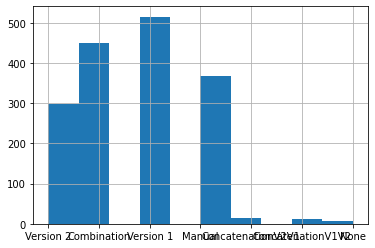

In [20]:
wro['developerdecision'].hist()

<AxesSubplot:>

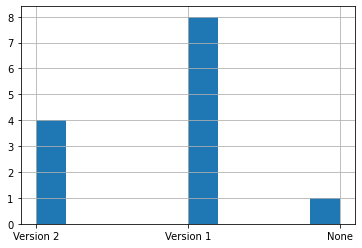

In [21]:
wro[wro['alex.objelean@gmail.com'] == 0]['developerdecision'].hist()
# wro.loc[wro['column_name'] == some_value]

<AxesSubplot:>

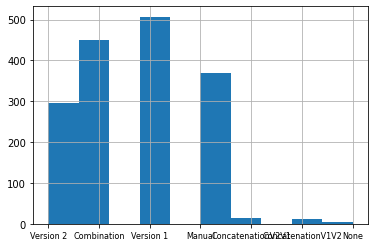

In [22]:
wro[wro['alex.objelean@gmail.com'] == 1]['developerdecision'].hist(xlabelsize=8)

Calculating information gain of alex.objelean@gmail.com

values of feature alex.objelean@gmail.com : 0 and 1.

When feature is 0

In [23]:
13 / 1650

0.00787878787878788

In [24]:
wro[wro['alex.objelean@gmail.com'] == 0]['developerdecision']

5       Version 2
10      Version 1
356     Version 1
367     Version 1
483     Version 1
526     Version 2
736     Version 2
775          None
778     Version 1
803     Version 1
835     Version 1
881     Version 1
1203    Version 2
Name: developerdecision, dtype: object

In [25]:
decisions = np.sort(wro['developerdecision'].unique())
decisions

array(['Combination', 'ConcatenationV1V2', 'ConcatenationV2V1', 'Manual',
       'None', 'Version 1', 'Version 2'], dtype=object)

In [26]:
# wro[wro['alex.objelean@gmail.com'] == 0]['developerdecision']\
# .unique()

In [27]:
# wro[(wro['alex.objelean@gmail.com'] == 0) & (wro['developerdecision'] == 'Version 1')]

In [28]:
wro[(wro['alex.objelean@gmail.com'] == 0) & (wro['developerdecision'] == 'Version 1')].shape[0]

8

In [29]:
def class_size(class_name, value):
    return wro[(wro['alex.objelean@gmail.com'] == value) & (wro['developerdecision'] == class_name)].shape[0]

In [30]:
classes_dist_value0 = list(map(lambda d: class_size(d, 0), decisions))
classes_dist_value0

[0, 0, 0, 0, 1, 8, 4]

In [31]:
type(classes_dist_value0[0])

int

In [32]:
#  -(class0 * log2(class0) + class1 * log2(class1))

In [33]:
def entropy(classes_dist):
    total = sum(classes_dist)
    entropy = 0
    print('class_size,', 'total,', 'frequency,', 'entropy')
    for c in classes_dist:
        freq = (c / total)
        if c != 0:
            entropy = entropy + freq * log2(freq)
        print(c, total, freq, entropy)
    entropy = entropy * -1
    return entropy

In [34]:
entropy0 = entropy(classes_dist_value0)
entropy0

class_size, total, frequency, entropy
0 13 0.0 0
0 13 0.0 0
0 13 0.0 0
0 13 0.0 0
1 13 0.07692307692307693 -0.28464920908777636
8 13 0.6153846153846154 -0.7156890356361407
4 13 0.3076923076923077 -1.2389012566026305


1.2389012566026305

When feature is 1

In [35]:
classes_dist_value1 = list(map(lambda d: class_size(d, 1), decisions))
classes_dist_value1

[449, 12, 14, 368, 5, 507, 295]

In [36]:
entropy1 = entropy(classes_dist_value1)
entropy1

class_size, total, frequency, entropy
449 1650 0.2721212121212121 -0.5109561968497103
12 1650 0.007272727272727273 -0.5626164718199795
14 1650 0.008484848484848486 -0.6209998266194087
368 1650 0.22303030303030302 -1.1037909259721532
5 1650 0.0030303030303030303 -1.129143417530474
507 1650 0.30727272727272725 -1.6522470809667333
295 1650 0.1787878787878788 -2.0962988104459894


2.0962988104459894

In [37]:
13/1650 * entropy0

0.009761040203535878

In [38]:
1663/1650 * entropy1

2.112815104104049

In [39]:
final_entropy = (13/1663 * entropy0) + (1650/1663 * entropy1)
final_entropy

2.089596364144147

## Testando

In [72]:
def entropy_attrib(df, attrib, y_attrib):
    data = df[[attrib, y_attrib]]
    classes = data[y_attrib].value_counts()\
        .reset_index(name='count')\
        .rename(columns={"index": "class_name"})
    total = classes['count'].sum()
    classes['percentage'] = classes['count'] / total
    classes['entropy'] = classes.apply(lambda row: \
                             -1 * row['percentage'] * log2(row['percentage']), axis = 1)
#     return classes
    return classes.sum()['entropy']

In [41]:
def information_gain(df, attrib, y_attrib):
    data = df[[attrib, y_attrib]]
    ent_initial = entropy_attrib(data, attrib, y_attrib)
    data_split = data.groupby([attrib])\
      .apply(lambda df_x: pd.Series({'percentage': df_x.shape[0]/data.shape[0],
                                     'entropy': entropy_attrib(df_x, attrib, y_attrib)}))
    data_split['weighted_entropy'] = data_split['percentage'] * data_split['entropy']
#     print(data_split)
    ent_final = data_split['weighted_entropy'].sum()
#     print(ent_final)
    return ent_initial - ent_final

In [42]:
information_gain(wro, 'alex.objelean@gmail.com', 'developerdecision')

0.009394610669805736

In [43]:
data = wro[['alex.objelean@gmail.com', 'developerdecision']]
data

,alex.objelean@gmail.com,developerdecision
0,1,Version 2
1,1,Combination
2,1,Version 2
3,1,Version 1
4,1,Version 1
...,...,...
1658,1,Combination
1659,1,Version 1
1660,1,Version 1
1661,1,Manual


In [44]:
ent_initial = entropy_attrib(data, 'alex.objelean@gmail.com', 'developerdecision')
ent_initial

2.098990974813953

In [45]:
data_split = data.groupby(['alex.objelean@gmail.com'])\
  .apply(lambda df_x: pd.Series({'percentage': df_x.shape[0]/data.shape[0],
                                 'entropy': entropy_attrib(df_x, 'alex.objelean@gmail.com', 'developerdecision')}))
data_split['weighted_entropy'] = data_split['percentage'] * data_split['entropy']
print(data_split)
# data_split
ent_final = data_split['weighted_entropy'].sum()
ent_final

                         percentage   entropy  weighted_entropy
alex.objelean@gmail.com                                        
0                          0.007817  1.238901          0.009685
1                          0.992183  2.096299          2.079912


2.089596364144147

In [46]:
ent_initial - ent_final

0.009394610669805736

In [47]:
dataset_dist = list(map(lambda d: wro[wro['developerdecision'] == d].shape[0], decisions))
dataset_dist

[449, 12, 14, 368, 6, 515, 299]

In [48]:
prior_entropy = entropy(dataset_dist)
prior_entropy

class_size, total, frequency, entropy
449 1663 0.269993986770896 -0.5100188620127534
12 1663 0.0072158749248346366 -0.5613569975694541
14 1663 0.00841852074564041 -0.6193792738395776
368 1663 0.2212868310282622 -1.1009017410558941
6 1663 0.0036079374624173183 -1.1301787462966617
515 1663 0.30968129885748646 -1.6538943645026718
299 1663 0.179795550210463 -2.098990974813953


2.098990974813953

In [49]:
final_entropy - prior_entropy

-0.009394610669805736

In [50]:
prior_entropy - final_entropy

0.009394610669805736

In [51]:
classifier_utils.get_information_gain(['v1', 'v2', 'v1', 'aaa'], [1,3,4,2])

feature_values: {1, 2, 3, 4}
When feature value == 1 ...
  When class == v1 ...
    temp_H: -0.0
  Hc_feature: 0.0
  When class == aaa ...
  Hc_feature: 0.0
  When class == v2 ...
  Hc_feature: 0.0
Feature value: 1, Hc_feature: 0.0
initial entropy:  1.5
final entropy:  0.0
initial entropy - final entropy:  1.5


1.5

In [52]:
conj = set([1,2])
conj

{1, 2}

In [53]:
for e in conj:
    print(e)

1
2


o problema era a identação do for!!

reproduzir o cálculo errado de information gain do dev

In [54]:
data.groupby(['alex.objelean@gmail.com']).describe()

developerdecision                       
                                    count unique        top freq
alex.objelean@gmail.com                                         
0                                      13      3  Version 1    8
1                                    1650      7  Version 1  507

In [55]:
1650 / 1663

0.9921828021647625

In [56]:
# data.dropna()

In [57]:
# classes = data['developerdecision'].unique()
# classes

In [58]:
# df_rows_count = data['alex.objelean@gmail.com'].count()
# df_rows_count

In [59]:
# classes_count = data['developerdecision'].value_counts()\
# .reset_index(name='count')\
# .rename(columns={"index": "class_name"})

# classes_count

In [60]:
# total = classes_count['count'].sum()
# classes_count['percentage'] = classes_count['count'] / total
# classes_count['entropy'] = classes_count.apply(lambda row: \
#                              -1 * row['percentage'] * log2(row['percentage']), axis = 1)
# classes_count

In [61]:
# classes_count.sum()['entropy']

In [62]:
entropy_attrib(wro, 'alex.objelean@gmail.com', 'developerdecision')

2.098990974813953

In [63]:
df_dist = data['developerdecision'].value_counts().to_dict()
df_dist

{'Version 1': 515,
 'Combination': 449,
 'Manual': 368,
 'Version 2': 299,
 'ConcatenationV2V1': 14,
 'ConcatenationV1V2': 12,
 'None': 6}

In [64]:
# entropy_result = 0
# for class_name,class_count in df_dist.items():
#     freq = class_count / df_rows_count
#     if class_count != 0:
#         class_entropy_contrib = -1 * freq * log2(freq)
#         entropy_result += class_entropy_contrib
#     print(f'class {class_name} has {class_count} rows and adds {class_entropy_contrib} to the class entropy')
# # entropy = entropy * -1
# entropy_result

In [65]:
df_dist_values = list(df_dist.values())
df_dist_values

[515, 449, 368, 299, 14, 12, 6]

In [66]:
# type(df_dist_values)
entropy(df_dist_values)

class_size, total, frequency, entropy
515 1663 0.30968129885748646 -0.52371561820601
449 1663 0.269993986770896 -1.0337344802187634
368 1663 0.2212868310282622 -1.5152569474350799
299 1663 0.179795550210463 -1.9603535577463607
14 1663 0.00841852074564041 -2.018375834016484
12 1663 0.0072158749248346366 -2.069713969573185
6 1663 0.0036079374624173183 -2.098990974813953


2.098990974813953

In [67]:
X = list(data['alex.objelean@gmail.com'])
X

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [68]:
y = list(data['developerdecision'])
y

['Version 2',
 'Combination',
 'Version 2',
 'Version 1',
 'Version 1',
 'Version 2',
 'Combination',
 'Combination',
 'Version 1',
 'Version 2',
 'Version 1',
 'Version 2',
 'Version 2',
 'Manual',
 'Manual',
 'Version 2',
 'Version 1',
 'Version 2',
 'Version 1',
 'Version 1',
 'Combination',
 'Version 1',
 'Manual',
 'Combination',
 'Version 2',
 'Version 2',
 'Version 2',
 'Version 2',
 'Manual',
 'Combination',
 'Version 1',
 'Version 2',
 'Manual',
 'Manual',
 'Version 1',
 'Combination',
 'Version 1',
 'Combination',
 'ConcatenationV2V1',
 'Version 1',
 'Combination',
 'Version 1',
 'Version 1',
 'Version 1',
 'Version 1',
 'Manual',
 'Manual',
 'Version 1',
 'Version 1',
 'Manual',
 'Manual',
 'Version 1',
 'Combination',
 'Version 1',
 'Combination',
 'Combination',
 'Version 1',
 'Version 2',
 'Version 1',
 'Version 1',
 'Version 1',
 'Manual',
 'Combination',
 'Version 1',
 'Manual',
 'Version 1',
 'Manual',
 'Version 2',
 'Manual',
 'Combination',
 'Manual',
 'Manual',
 'Ve

In [69]:
classifier_utils.get_information_gain(y, X)

feature_values: {0, 1}
When feature value == 0 ...
  When class == ConcatenationV1V2 ...
  Hc_feature: 0
  When class == Combination ...
  Hc_feature: 0
  When class == None ...
    temp_H: 0.0022251591810830383
  Hc_feature: 0.0022251591810830383
  When class == Version 2 ...
    temp_H: 0.004090053441109061
  Hc_feature: 0.0063152126221921
  When class == Version 1 ...
    temp_H: 0.0033695235989950317
  Hc_feature: 0.00968473622118713
  When class == Manual ...
  Hc_feature: 0.00968473622118713
  When class == ConcatenationV2V1 ...
  Hc_feature: 0.00968473622118713
Feature value: 0, Hc_feature: 0.00968473622118713
initial entropy:  2.098990974813953
final entropy:  0.00968473622118713
initial entropy - final entropy:  2.0893062385927657


2.0893062385927657

In [73]:
def get_information_gain(y_attrib, attrib):
    dict = {'attrib': attrib, 'y_attrib': y_attrib}
    df = pd.DataFrame(dict)
    return information_gain(df, 'attrib', 'y_attrib')

In [79]:
get_information_gain(['v1', 'v2', 'v1', 'v2'],[0, 1, 0, 1])

1.0

In [82]:
list(wro['developerdecision'])

['Version 2',
 'Combination',
 'Version 2',
 'Version 1',
 'Version 1',
 'Version 2',
 'Combination',
 'Combination',
 'Version 1',
 'Version 2',
 'Version 1',
 'Version 2',
 'Version 2',
 'Manual',
 'Manual',
 'Version 2',
 'Version 1',
 'Version 2',
 'Version 1',
 'Version 1',
 'Combination',
 'Version 1',
 'Manual',
 'Combination',
 'Version 2',
 'Version 2',
 'Version 2',
 'Version 2',
 'Manual',
 'Combination',
 'Version 1',
 'Version 2',
 'Manual',
 'Manual',
 'Version 1',
 'Combination',
 'Version 1',
 'Combination',
 'ConcatenationV2V1',
 'Version 1',
 'Combination',
 'Version 1',
 'Version 1',
 'Version 1',
 'Version 1',
 'Manual',
 'Manual',
 'Version 1',
 'Version 1',
 'Manual',
 'Manual',
 'Version 1',
 'Combination',
 'Version 1',
 'Combination',
 'Combination',
 'Version 1',
 'Version 2',
 'Version 1',
 'Version 1',
 'Version 1',
 'Manual',
 'Combination',
 'Version 1',
 'Manual',
 'Version 1',
 'Manual',
 'Version 2',
 'Manual',
 'Combination',
 'Manual',
 'Manual',
 'Ve

In [83]:
list(wro['alex.objelean@gmail.com'])

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [81]:
get_information_gain(list(wro['developerdecision']), list(wro['alex.objelean@gmail.com']))

0.009394610669805736

In [80]:
information_gain(wro, 'alex.objelean@gmail.com', 'developerdecision')

0.009394610669805736